# Hipótesis relativa a dos medias
## Inferencia relativa a dos medias
###### https://www.statsmodels.org/stable/stats.html#multiple-tests-and-multiple-comparison-procedures
###### https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttest_ind.html#statsmodels.stats.weightstats.ttest_ind

In [17]:
import numpy as np
import statsmodels.stats.weightstats as smw
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Discriminación por edad  
+ Los Revenue Commissioners de Irlanda realizaron un concurso de promoción. 
    + A continuación se muestran las edades de los solicitantes que tuvieron éxito y de los que no tuvieron éxito 
        + (según datos de “Debating the Use of Statistical Evidence in Allegations of Age Discrimination”, de Barry y Boland, American Statistician, vol. 58, núm. 2)
        + Algunos de los solicitantes que no tuvieron éxito para obtener la promoción se quejaron de que hubo discriminación por edad en la competencia. 

In [18]:
# Datos
sin_exito = np.array([34, 37, 37, 38, 41, 42, 43, 44, 44, 45, 45, 45, 46, 48, 49, 53, 53, 54, 54, 55, 45, 45, 46, 48, 49, 53, 53, 54, 54, 55, 56, 57, 60])
con_exito = np.array([27, 33, 36, 37, 38, 38, 39, 42, 42, 43, 43, 44, 44, 44, 45, 45, 45, 45, 46, 46, 43, 44, 44, 44, 45, 45, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 51, 51, 52, 54])

 + Utilice un nivel de significancia de 0.05 para poner a prueba la aseveración de que 
    + los solicitantes sin éxito provienen de una población con una edad media mayor que la de los solicitantes exitosos. 
+ Con base en el resultado, ¿parece haber discriminación por la edad?

In [19]:
# Estadísticas descriptivas
mean_sin_exito = np.mean(sin_exito)
mean_con_exito = np.mean(con_exito)
std_sin_exito = np.std(sin_exito, ddof=1)
std_con_exito = np.std(con_exito, ddof=1)
n_sin_exito = len(sin_exito)
n_con_exito = len(con_exito)

# Cálculo manual del estadístico t
t_manual = (mean_sin_exito - mean_con_exito) / np.sqrt((std_sin_exito**2 / n_sin_exito) + (std_con_exito**2 / n_con_exito))

# Prueba t utilizando statsmodels
t_stat, p_value, df = smw.ttest_ind(sin_exito, con_exito, alternative='larger', usevar='unequal')

# Resultados
print(f'Estadístico t (manual): {t_manual:.4f}')
print(f'Estadístico t (statsmodels): {t_stat:.4f}')
print(f'Valor p: {p_value:.4f}')
print(f'Grados de libertad: {df:.4f}')


Estadístico t (manual): 2.7351
Estadístico t (statsmodels): 2.7351
Valor p: 0.0041
Grados de libertad: 59.8888


**Observaciones**
+ **Valor p:** El valor p es 0.0041, que es menor que el nivel de significancia de 0.05. 
    + Esto indica **que existe suficiente evidencia para rechazar la hipótesis nula**.

**Interpretación:** 
+ El resultado sugiere que la media de edad de los solicitantes sin éxito es significativamente mayor que la de los solicitantes exitosos, 
    + lo que podría ser un indicio de discriminación por edad en el proceso de selección.

**Grados de libertad:** 
+ Los grados de libertad calculados indican que el análisis es confiable, lo que refuerza la validez del resultado obtenido.

**Conclusión**
+ Este análisis permite concluir que podría haber discriminación por edad en este caso, 
    + dado que los solicitantes sin éxito tienen una media de edad significativamente mayor que los solicitantes exitosos.

### Grafico
Debe notarse el gráfico permite visualizar la formas de las muestras pero no sirve para calcular pruebas de hipótesis.

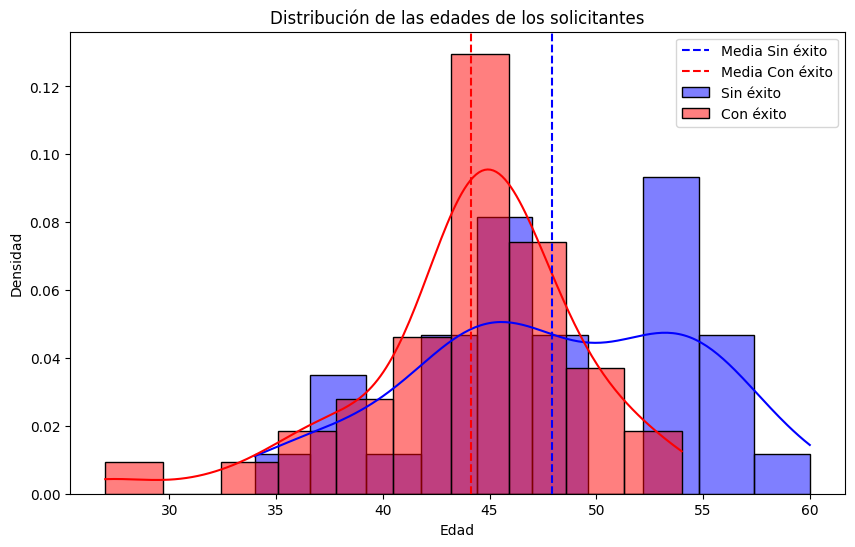

In [20]:
# Gráfico de las distribuciones de las edades
plt.figure(figsize=(10, 6))
sns.histplot(sin_exito, color="blue", kde=True, label="Sin éxito", stat="density", bins=10)
sns.histplot(con_exito, color="red", kde=True, label="Con éxito", stat="density", bins=10)
plt.axvline(mean_sin_exito, color="blue", linestyle="--", label="Media Sin éxito")
plt.axvline(mean_con_exito, color="red", linestyle="--", label="Media Con éxito")
plt.title("Distribución de las edades de los solicitantes")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.legend()
plt.show()

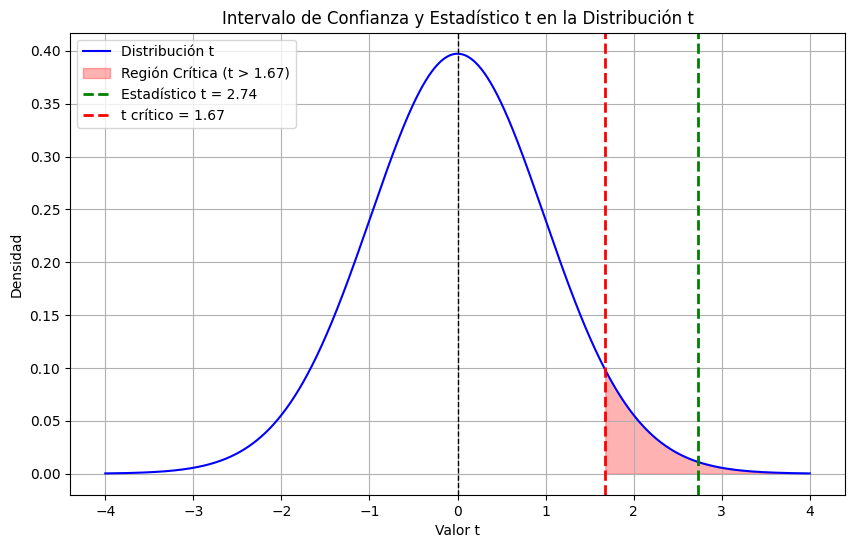

In [21]:
# Puntos para la distribución t
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)
alpha = 0.05  # Nivel de significancia
t_crit = stats.t.ppf(1 - alpha, df)  # Valor t crítico para una cola

# Gráfico de la distribución t
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='Distribución t')

# Áreas bajo la curva
plt.fill_between(x, y, where=(x >= t_crit), color='red', alpha=0.3, label=f'Región Crítica (t > {t_crit:.2f})')

# Marcando el estadístico t y los límites del intervalo de confianza
plt.axvline(t_stat, color='green', linestyle='--', lw=2, label=f'Estadístico t = {t_stat:.2f}')
plt.axvline(t_crit, color='red', linestyle='--', lw=2, label=f't crítico = {t_crit:.2f}')
plt.axvline(0, color='black', linestyle='--', lw=1)

# Configuraciones adicionales
plt.title('Intervalo de Confianza y Estadístico t en la Distribución t')
plt.xlabel('Valor t')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

### Intervalo de confianza


In [22]:
# Varianzas
var_sin_exito = np.var(sin_exito, ddof=1)
var_con_exito = np.var(con_exito, ddof=1)

# Error estándar de la diferencia de medias
se_diff = np.sqrt(var_sin_exito/n_sin_exito + var_con_exito/n_con_exito)
print(f"Error Estandard:{se_diff}")

# Valor crítico t para el nivel de significancia del 5% (intervalo de confianza del 95%)
t_critical = stats.t.ppf(1 - 0.025, df)

# Intervalo de confianza
ci_lower = (mean_sin_exito - mean_con_exito) - t_critical * se_diff
ci_upper = (mean_sin_exito - mean_con_exito) + t_critical * se_diff

print(f"Intervalo de confianza para la diferencia de medias (manual): ({ci_lower}, {ci_upper})")

# Crear el objeto CompareMeans
cm = sms.CompareMeans(sms.DescrStatsW(sin_exito), sms.DescrStatsW(con_exito))

# Calcular el intervalo de confianza para la diferencia de medias
ic = cm.tconfint_diff(usevar='unequal', alpha=0.05)

print(f"Intervalo de confianza para la diferencia de medias (statsmodels): {ic}")

Error Estandard:1.394621187904568
Intervalo de confianza para la diferencia de medias (manual): (1.024629645924667, 6.604158232863208)
Intervalo de confianza para la diferencia de medias (statsmodels): (1.024629645924667, 6.604158232863208)


**Observación**
+ El intervalo de confianza al 95% para la diferencia de las medias de edad entre los solicitantes sin éxito y los solicitantes con éxito es:
    + de aproximadamente (1.02,6.60).

**Interpretación**
+ Este intervalo de confianza sugiere que, con un 95% de confianza, la verdadera diferencia en las edades medias de los solicitantes sin éxito y con éxito
    + se encuentra entre 1.02 y 6.60 años. Dado que el intervalo de confianza es completamente positivo, 
    + esto respalda la conclusión de que los solicitantes sin éxito tienden a ser significativamente mayores que los solicitantes con éxito, 
    + lo que podría ser un indicio de discriminación por edad en el proceso de selección. ​

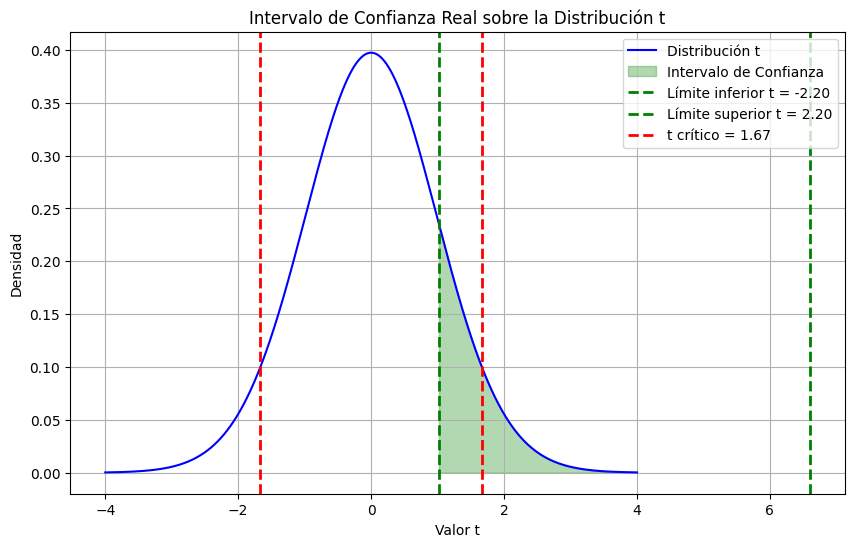

In [23]:
# Cálculo de los valores t correspondientes a los límites del intervalo de confianza real
mean_diff = 3.81  # Diferencia media entre las edades de los dos grupos
std_error_diff = 1.27  # Error estándar de la diferencia de medias
lower_bound = 1.02
upper_bound = 6.60

# Gráfico de la distribución t
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='Distribución t')

# Área del intervalo de confianza
plt.fill_between(x, y, where=((x >= lower_bound) & (x <= upper_bound)), color='green', alpha=0.3, label='Intervalo de Confianza')

# Líneas para los límites del intervalo de confianza
plt.axvline(lower_bound, color='green', linestyle='--', lw=2, label=f'Límite inferior t = {t_lower:.2f}')
plt.axvline(upper_bound, color='green', linestyle='--', lw=2, label=f'Límite superior t = {t_upper:.2f}')

# Líneas del valor t crítico
plt.axvline(t_crit, color='red', linestyle='--', lw=2, label=f't crítico = {t_crit:.2f}')
plt.axvline(-t_crit, color='red', linestyle='--', lw=2)

# Configuraciones adicionales
plt.title('Intervalo de Confianza Real sobre la Distribución t')
plt.xlabel('Valor t')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

_____________________________________________________________________________________________________________________________________________________________________